In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
image = cv2.imread('C:/Users/Kumar/OneDrive/Desktop/Brain Spy/week 1/pikachu.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_bw = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
image_bw_blur = cv2.GaussianBlur(image_bw, (5, 5), 2)
[rows, columns] = np.shape(image_bw)
print (type(rows))
#image_bw_blur_double = double(image_bw_blur)


<class 'int'>


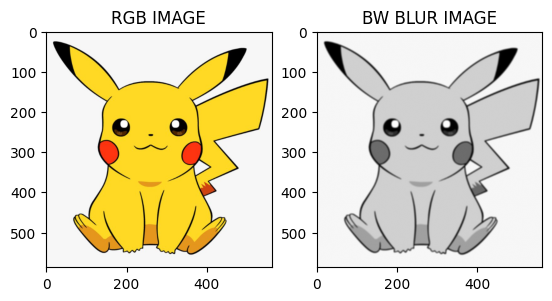

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("RGB IMAGE")
plt.subplot(1,2,2)
plt.imshow(image_bw_blur, cmap='grey')
plt.title("BW BLUR IMAGE")
plt.show()

Text(0.5, 1.0, 'Edge Detected (Sobel)')

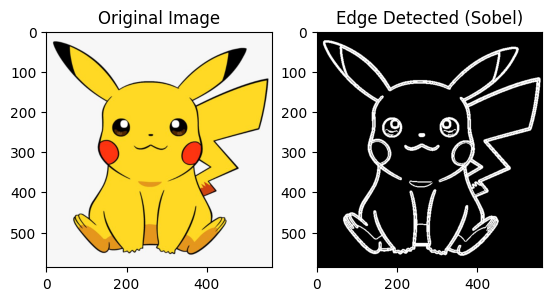

In [36]:
#Edge Detection SOBEL

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)

sobel_x = cv2.Sobel(image_bw_blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_bw_blur, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
threshold = 69
edges = magnitude > threshold

plt.imshow(edges, cmap='grey')
plt.title("Edge Detected (Sobel)")

Text(0.5, 1.0, 'Edge Detected (Sobel) from Scratch')

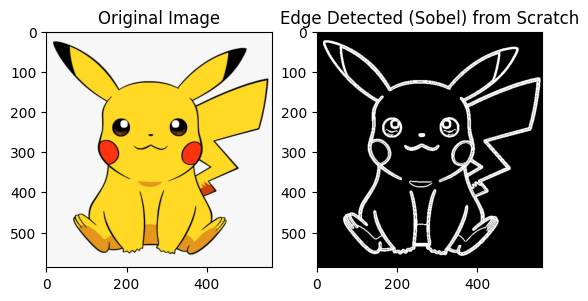

In [37]:
#Edge detection SOBEL from scratch
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
[rows, columns] = np.shape(image_bw)
image_sobel = np.zeros((rows, columns))
threshold_sobel = 70
Mx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
My = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Mx, image_bw_blur[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(My, image_bw_blur[i:i + 3, j:j + 3]))  # y direction
        image_sobel[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

edges_sobel = image_sobel > threshold_sobel

plt.imshow(edges_sobel, cmap='grey')
plt.title("Edge Detected (Sobel) from Scratch")

Text(0.5, 1.0, 'Edge Detected (Scharr)')

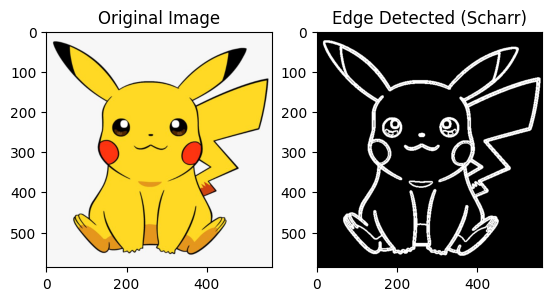

In [8]:
#Edge Detection SCHARR

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)

scharr_x = cv2.Scharr(image_bw_blur, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image_bw_blur, cv2.CV_64F, 0, 1)
magnitude = np.sqrt(scharr_x**2 + scharr_y**2)
threshold = 200
edges = magnitude > threshold

plt.imshow(edges, cmap='grey')
plt.title("Edge Detected (Scharr)")

Text(0.5, 1.0, 'Edge Detected (Scharr) from Scratch')

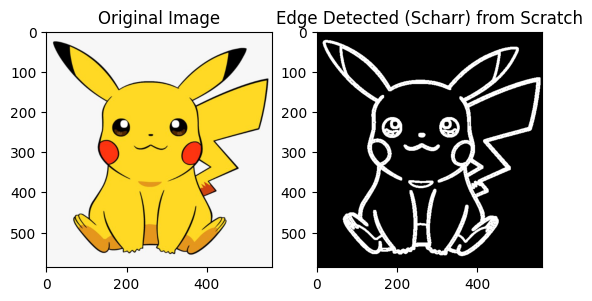

In [35]:
#Edge detection SCHARR from scratch
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.subplot(1,2,2)
[rows, columns] = np.shape(image_bw)
image_scharr = np.zeros((rows, columns))
threshold_scharr = 70
Mx = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
My = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Mx, image_bw_blur[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(My, image_bw_blur[i:i + 3, j:j + 3]))  # y direction
        image_scharr[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

edges_scharr = image_scharr > threshold_scharr

plt.imshow(edges_scharr, cmap='grey')
plt.title("Edge Detected (Scharr) from Scratch")

Text(0.5, 1.0, 'Edge Detected (Canny)')

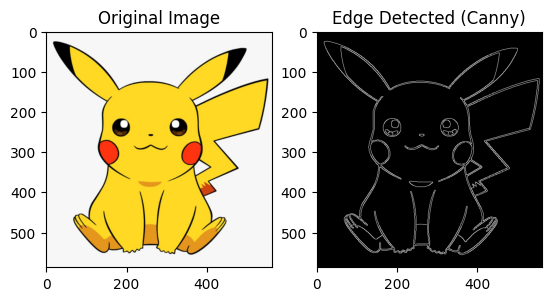

In [9]:
#Edge Detection CANNY

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
min_threshold = 50
max_threshold = 90
edges = cv2.Canny(image_bw, min_threshold, max_threshold)

plt.imshow(edges, cmap='grey')
plt.title("Edge Detected (Canny)")

In [16]:
#from scipy.signal import convolve2d
# mat= np.zeros((15,15))
# mat[7] = np.ones(15)
# mat = mat/15
# output = cv2.filter2D(image_rgb,-1,mat)
# plt.axis('off')
# plt.imshow(output, cmap='grey')